<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/Custom_Dataset_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

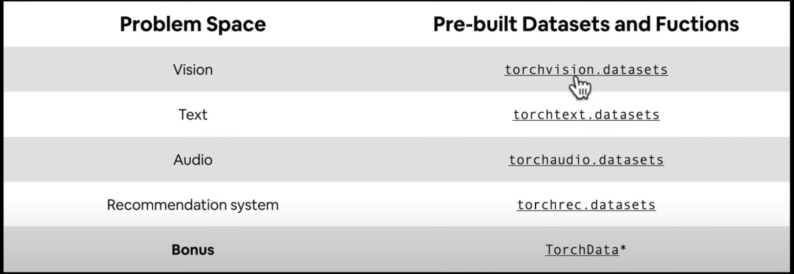

In [2]:
import torch
from torch import nn

In [3]:
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"
device

'cpu'

In [4]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists...skipping download")
else:
  print(f"{image_path} does not exist,downloading")
  image_path.mkdir(parents=True,exist_ok=True)

with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza,steak,sushi data....")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza,steak,sushi data....")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist,downloading
Unzipping pizza,steak,sushi data....


In [5]:
# Set up train and testing paths
train_dir=image_path/"train"
test_dir=image_path/"test"

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))



1. Get all of the image paths

1.   Pcik a random image path using pythons random.choice()
2.  Get the image class name using `pathlib.Path.parent.stem`


2.   Since we are working with images,lets open the image with pythons PIL


5.   we'll then show the image snd print metadata






`GLOB` means gathering all...so with the help of glob we will gather all type of images.

In [6]:
import random
from PIL import Image
image_path_list=list(image_path.glob("*/*/*.jpg"))

image_path_list

[PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/231296.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/100135.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2163079.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1225762.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2881783.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/239025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/937133.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/922752.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2648423.jpg'),
 PosixPath('da

In [7]:
# Pick random image
random_image_path=random.choice(image_path_list)
random_image_path

PosixPath('data/pizza_steak_sushi/train/pizza/2885050.jpg')

pizza
Image path: data/pizza_steak_sushi/train/pizza/2885050.jpg
Image class: pizza
Image size: (512, 512)


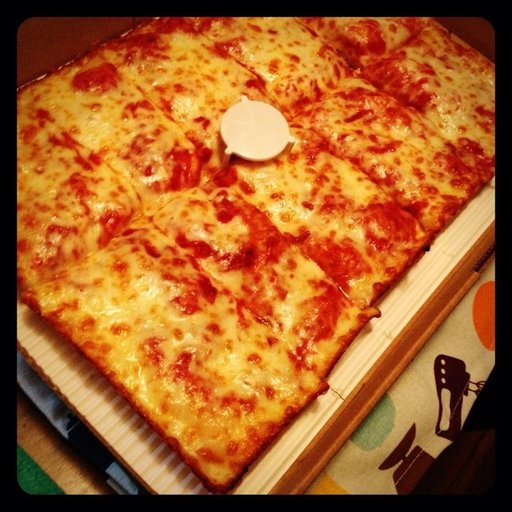

In [8]:
# Get the image class from path name
image_class=random_image_path.parent.stem
print(image_class)

img=Image.open(random_image_path)
print(f"Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")
img

#Plotting using matplotlib

(-0.5, 511.5, 511.5, -0.5)

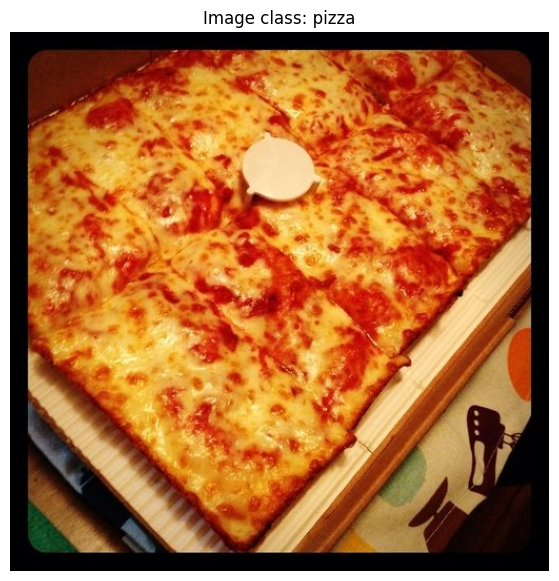

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class}")
plt.axis(False)

array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)
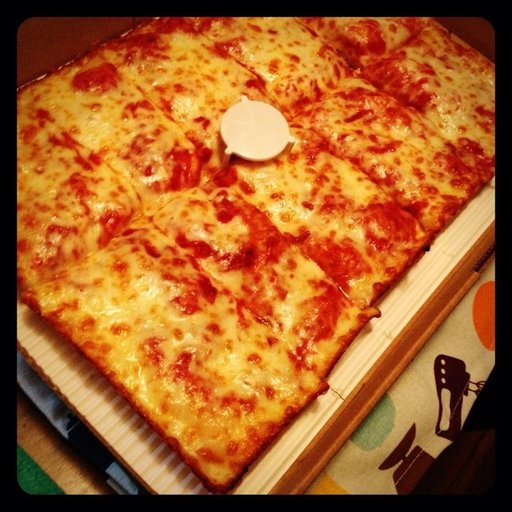

In [10]:
img_as_array

#Transforming the data

Converting it to tensor

Transforms help you get your images ready to be used with a model/perform data augmentation.

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [12]:
data_transform=transforms.Compose([
    transforms.Resize(size=(64,64)), # this is a general size,commonly used
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [13]:
data_transform(img)  #it accepts a PIL image or numpy array

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0431,  ..., 0.0471, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0078,  ..., 0.0196, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0039, 0.0118,  ..., 0.0157, 0.0039, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0039,  ..., 0.0392, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
         [0.0078, 0.0078, 0.0157,  ..., 0.0157, 0.0078, 0.

In [14]:
data_transform(img).dtype

torch.float32

TypeError: Invalid shape (3, 64, 64) for image data

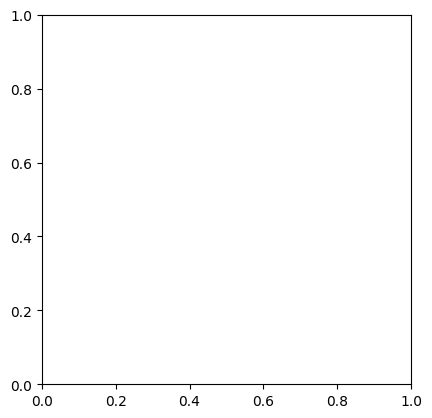

In [15]:
ans=data_transform(img)
plt.imshow(ans)

This error comes so to fix this error as the color channels should be last so we will use `permute()`...this will set the color channels at the end

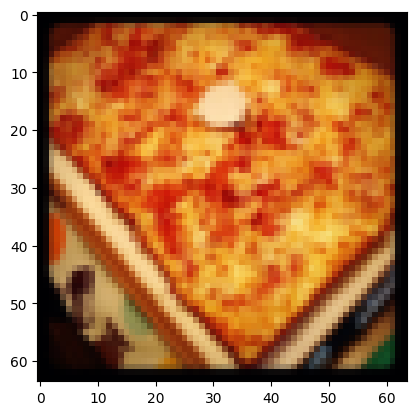

In [16]:
ans=data_transform(img).permute(1,2,0)
plt.imshow(ans)

You can see that the image has been transformed..ie in the above pic the chopstick was on left side now its on right side

In [17]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  """
  this selects random images from a path of images and loads/transforms
  then plots the original vs the tranformed version
  """
  if seed:
    random.seed(seed)
  random_image_path=random.sample(image_path_list,k=n) # This function from Python's random module selects k unique elements randomly from a sequence (like a list or set).

  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot image
      transformed_image=transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")
      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)



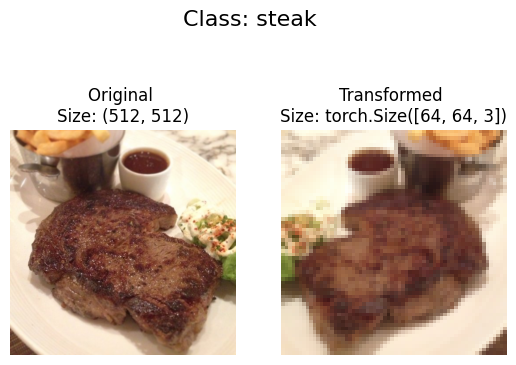

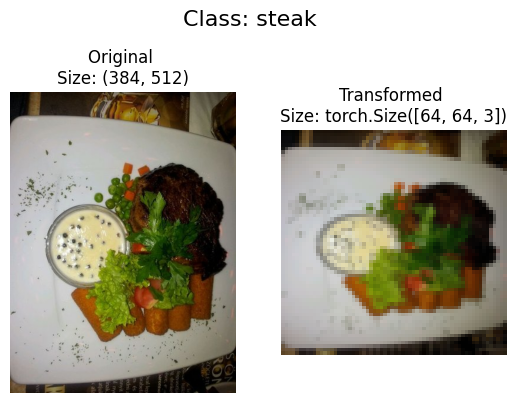

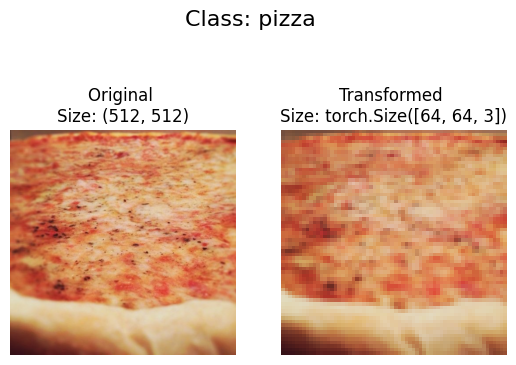

In [18]:
plot_transformed_images(image_path_list,data_transform,n=3,seed=42)

##There r many other transforms we can go through it from the document online

#The above method is just the hard way to load the data....we can use torchvision datasets pre built function called as `IMAGEFOLDER`

In [19]:
from torchvision import datasets
train_data=datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

train_data,test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
img,label=train_data[0]
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [23]:
class_names[label]

'pizza'

In [24]:
img.shape

torch.Size([3, 64, 64])

(-0.5, 63.5, 63.5, -0.5)

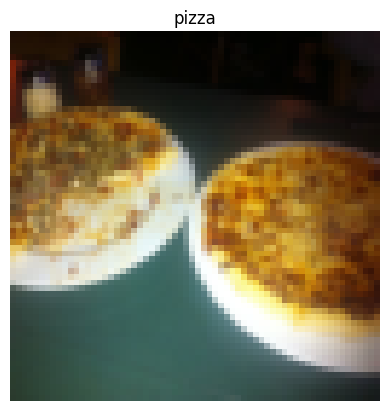

In [25]:
plt.imshow(img.squeeze().permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

In [26]:
from torch.utils.data import DataLoader

train_dataloader=DataLoader(train_data,
                            batch_size=1,
                            num_workers=1, #This is the number of cpu's we want to use, so that our data isnt used by many cpu's
                            shuffle=True)
test_dataloader=DataLoader(test_data,
                           batch_size=1,
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cf39a5270d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7cf39a717490>)

In [27]:
len(train_dataloader),len(test_dataloader)

(225, 75)

In [28]:
img,label=next(iter(train_dataloader))
print(f"Image shape:{img.shape}")
print(f"Label shape:{label.shape}")

Image shape:torch.Size([1, 3, 64, 64])
Label shape:torch.Size([1])


#This is another way to retrieve data from the folder

In [29]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import dataset
from torchvision import transforms
from typing import Tuple,Dict,List

In [30]:
target_directory=train_dir
print(f"Target dir:{target_directory}")

Target dir:data/pizza_steak_sushi/train


In [31]:
class_names_found=sorted([entry.name for entry in list (os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [32]:
def find_classes(directory:str)->Tuple[List[str],Dict[str,int]]:
  classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Couldnt find any classes in {directory}....please check file structure")

  class_to_idx={class_name:i for i,class_name in enumerate(classes)}
  return classes,class_to_idx

In [33]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###Create a custom 'Dataset' to replicate 'ImageFolder'

To create our own custom dataset,we want to:


1.  subclass `torch.utils.data.Dataset`

1.   Init our subclass with a target directory(the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
2.   Create several attributes:
  paths-path of our images

  transform-the transform we'd like to use

  classes-a list of the target classes

  class_to_idx-a dict of the target classes mapped to integer labels


2. Create a function to `load_images()`


1.   Overwrite the `__len()__` method to return length of our dataset
2.   Overwrite the `__getitem()__` method to return a given sample when passed an index



All datasets that represent a map from keys to data samples should subclass it. All subclasses should overwrite __getitem__(), supporting fetching a data sample for a given key. Subclasses could also optionally overwrite __len__(), which is expected to return the size of the dataset by many Sampler implementations and the default options of DataLoader. Subclasses could also optionally implement __getitems__(), for speedup batched samples loading. This method accepts list of indices of samples of batch and returns list of samples.



In [34]:
from torch.utils.data import Dataset

#1 subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

  #2. Initialize our custom dataset
  def __init__(self,targ_dir:str,transform=None):

    #3. Create class attributes
    # get all paths
    self.paths=list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    # set up tranforms
    self.transform=transform
    #Create classes
    self.classes,self.class_to_idx=find_classes(targ_dir)
   #Create a function to load images

  def load_image(self,index:int)->Image.Image:

    image_path=self.paths[index]
    return Image.open(image_path)

    #5. overwrite __len__()

  def __len__(self)->int:
     """Return the number of samples"""
     return len(self.paths)

    #6 Overwrite __getItem__() method to return a particular sample
  def __getitem__(self,index:int)-> Tuple[torch.Tensor,int]:
    "returns one sample of data,data and label(X,y)"
    img=self.load_image(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img),class_idx #return data,label (X,y)
    else:
      return img,class_idx





In [35]:
#Create a transform
from torchvision import transforms
train_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms=transforms.Compose([transforms.Resize(size=(64,64)),
                                    transforms.ToTensor()
                                    ])

In [36]:
train_data_custom=ImageFolderCustom(targ_dir=train_dir,
                                    transform=train_transforms)

test_data_custom=ImageFolderCustom(targ_dir=test_dir,
                                   transform=test_transforms)

In [37]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7cf39a8bde50>,
 <__main__.ImageFolderCustom at 0x7cf39a881350>)

In [38]:
len(train_data),len(train_data_custom)

(225, 225)

In [39]:
len(test_data),len(test_data_custom)

(75, 75)

In [40]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [41]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

#Creating a custom function to print the images

In [42]:
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes:List[str]=None,
                          n:int=10,
                          display_shape:bool=True,
                          seed:int=None):
  if n>10:
    n=10
    display_shape=False
    print(f"For display,purposes,n shouldnt be larger than 10")

  if seed:
    random.seed(seed)

  random_samples_idx=random.sample(range(len(dataset)),k=n)

  plt.figure(figsize=(16,8))
  for i,targ_sample in enumerate(random_samples_idx):
    targ_image,targ_label=dataset[targ_sample][0],dataset[targ_sample][1]

    targ_image_adjust=targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      plt.title(classes[targ_label])
    else:
      plt.title(targ_label)



In [43]:
random_image=random.sample(range(len(train_data)),k=10)
random_image

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

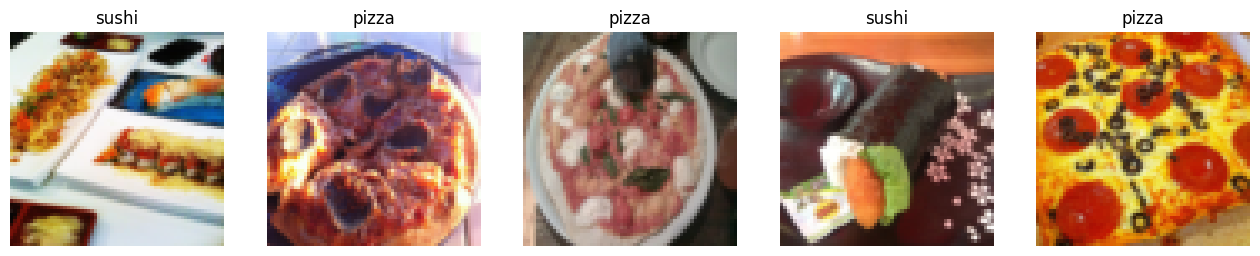

In [44]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=42)

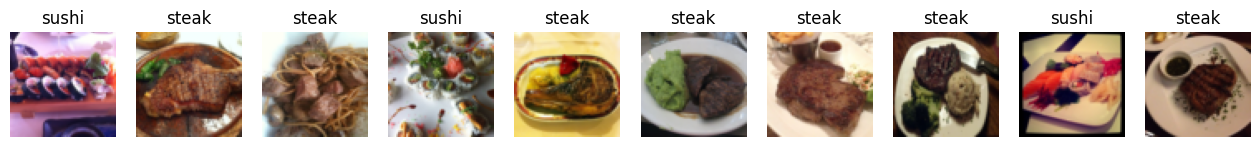

In [45]:
display_random_images(train_data_custom,
                      n=10,
                      classes=class_names,
                      seed=42)

#Turn custom loadedd images into Dataloaders

In [46]:
from torch.utils.data import DataLoader
NUM_WORKERS=os.cpu_count()
train_dataloader_custom=DataLoader(dataset=train_data_custom,
                                   batch_size=1,
                                   num_workers=NUM_WORKERS,
                                   shuffle=True)
test_dataloader_custom=DataLoader(dataset=test_data_custom,
                                  batch_size=1,
                                  num_workers=NUM_WORKERS,
                                  shuffle=False)

In [47]:
img_custom,label_custom=next(iter(train_dataloader_custom))
img_custom.shape,label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

#WHAT IS TRANSFORMS/DATA AUGMENTATION

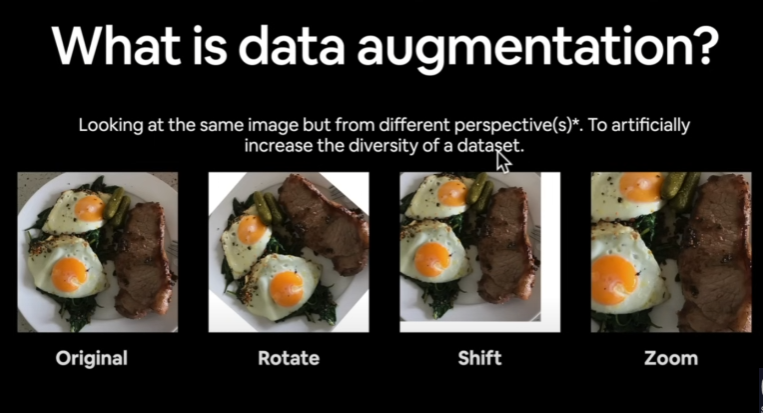

#WAYS TO INCREASE THE MODELS ACCURACY

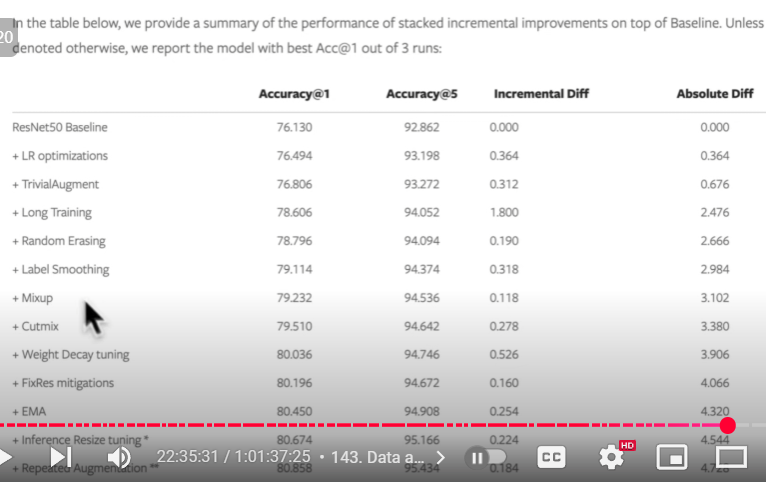

In case of image data, this may mean applying various image tranformations to the training images

This practice hopefully results in a model thats more generalizable to unseen data.

In [48]:
#trivial augment is a type of transform that worked well during research..so lets try it out

from torchvision import transforms

train_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [49]:
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/231296.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/100135.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2163079.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1225762.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2881783.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg')]

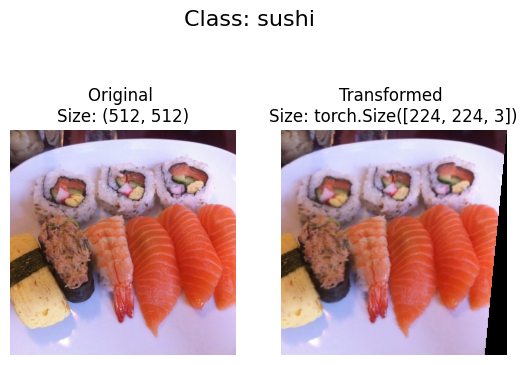

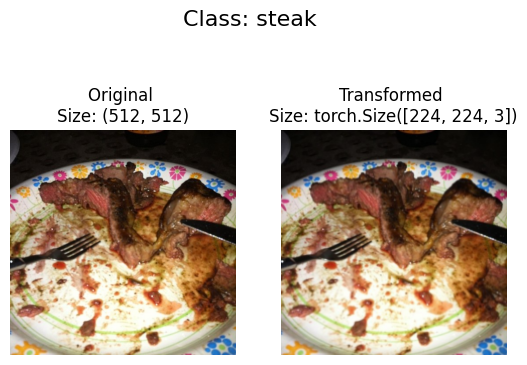

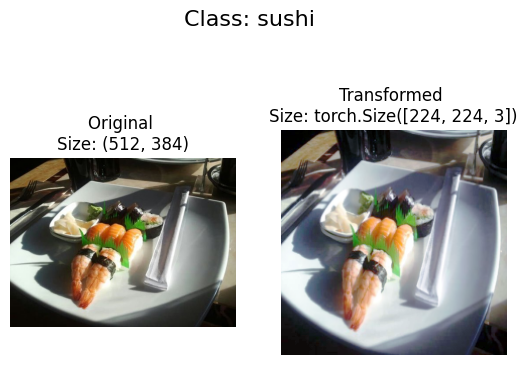

In [50]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

In [51]:
simple_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [52]:
from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir,
                                       transform=simple_transform)
test_data_simple=datasets.ImageFolder(root=test_dir,
                                      transform=simple_transform)

#turn the datasets into dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

#Create DataLoaders
train_dataloader_simple=DataLoader(dataset=train_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=True,
                                   num_workers=NUM_WORKERS)

test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  num_workers=NUM_WORKERS)


In [53]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int) -> None:
               super().__init__()
               self.conv_block_1=nn.Sequential(
                   nn.Conv2d(in_channels=input_shape,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )
               self.conv_block_2=nn.Sequential(
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )
               self.classifier=nn.Sequential(
                   nn.Flatten(),
                   nn.Linear(in_features=hidden_units*13*13, #10*16*16
                             out_features=output_shape)
               )
  def forward(self,x):
    x=self.conv_block_1(x)
    print(x.shape)
    x=self.conv_block_2(x)
    print(x.shape)
    x=self.classifier(x)
    print(x.shape)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [54]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [55]:
image_batch,label_batch=next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [56]:
model_0(image_batch.to(device))

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [57]:

#we can print the summary of the model
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [58]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss,train_acc=0,0

  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    y_pred=model(X)


    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)

  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss,train_acc


In [59]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  model.eval()

  test_loss,test_acc=0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y=X.to(device),y.to(device)

      test_pred_logits=model(X)

      loss=loss_fn(test_pred_logits,y)
      test_loss+=loss.item()

      test_pred_labels=test_pred_logits.argmax(dim=1)
      test_acc+=((test_pred_labels==y).sum().item()/len(test_pred_labels))

  test_loss=test_loss/len(dataloader)
  test_acc=test_acc/len(dataloader)
  return test_loss,test_acc

In [60]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):
  results={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[]}
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc=train_step(model=model,
                                    dataloader=train_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer=optimizer,
                                    device=device)
    test_loss,test_acc=test_step(model=model,
                                 dataloader=test_dataloader,
                                 loss_fn=loss_fn,
                                 device=device)
    print(f"Epoch: {epoch} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

#TRAIN AND EVALUATE MODEL 0

In [61]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5

model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_0.parameters(),
                           lr=0.0001)

from timeit import default_timer as timer
start_time=timer()

model_0_results=train(model=model_0,
                      train_dataloader=train_dataloader_simple,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)
end_time=timer()
print(f"Total training time:{end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([11, 10, 30, 30])
torch.Size([11, 10, 13, 13])
torch.Size([11, 3])
Epoch: 0 | train_loss: 1.0990 | train_acc: 0.3047 | test_loss: 1.0979 | test_acc: 0.2604
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13]

In [62]:
def plot_loss_curves(results:Dict[str,List[float]]):
  loss=results["train_loss"]
  test_loss=results["test_loss"]

  accuracy=results["train_acc"]
  test_accuracy=results["test_acc"]

  epochs=range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,test_accuracy,label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend()

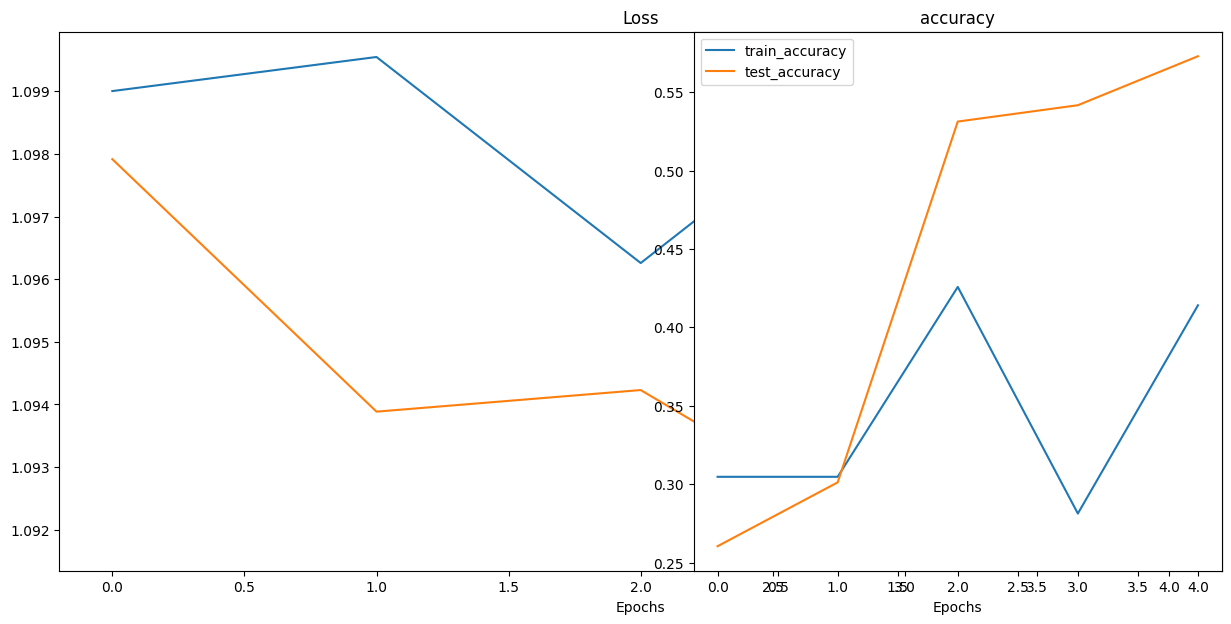

In [63]:
plot_loss_curves(model_0_results)

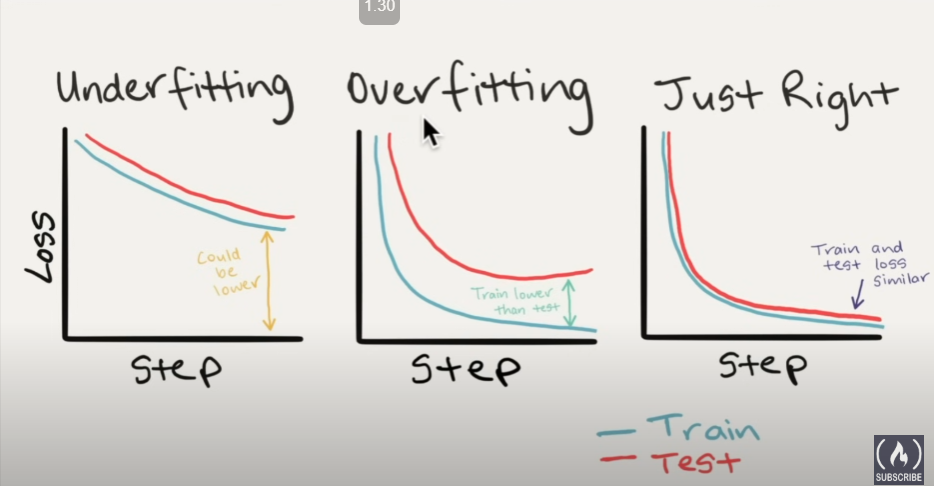

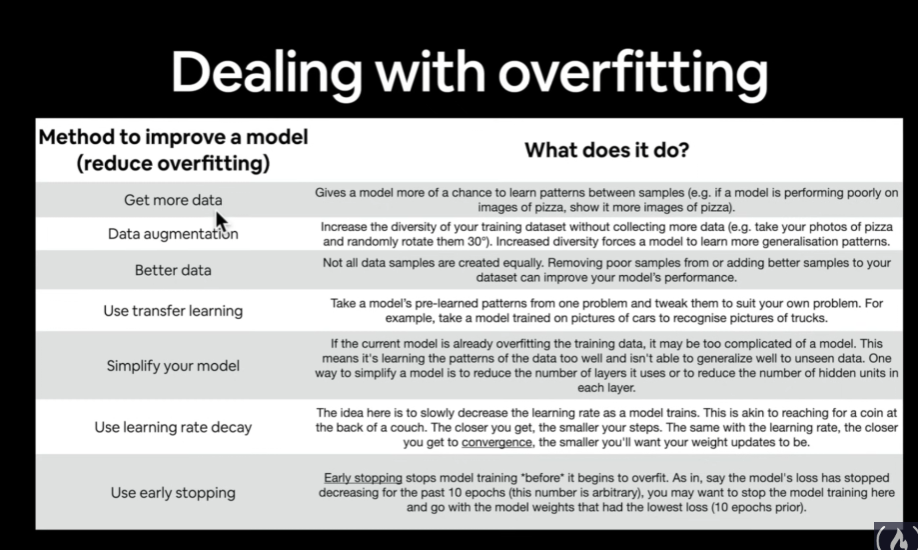

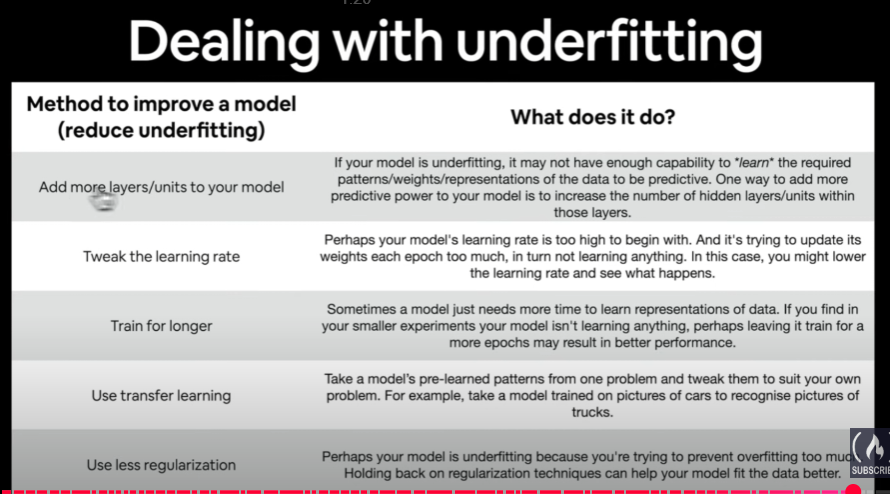

#Tiny VGG model but with data augmentation


Create transform with data augmentation


In [64]:
from torchvision import transforms
train_transform_trivial=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

Create train and test Datasets and Dataloaders with data augmentation

In [65]:
from torchvision import datasets
train_data_augmented=datasets.ImageFolder(root=train_dir,
                                          transform=train_transform_trivial)
test_data_simple=datasets.ImageFolder(root=test_dir,
                                      transform=test_transform_simple)

In [66]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [67]:
#turn datasets into Dataloaders
from torch.utils.data import DataLoader
import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented=DataLoader(dataset=train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       num_workers=NUM_WORKERS,
                                       shuffle=True)
test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  num_workers=NUM_WORKERS,
                                  shuffle=False)

In [68]:
#Create model_1 and sent it to the target device
torch.manual_seed(42)
model_1=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [69]:
 torch.manual_seed(42)
 torch.cuda.manual_seed(42)

 NUM_EPOCHS=5

 loss=nn.CrossEntropyLoss()
 optimizer=torch.optim.Adam(model_1.parameters(),lr=0.001)

 from timeit import default_timer as timer
 start_time=timer()

 model_1_results=train(model=model_1,
                       train_dataloader=train_dataloader_augmented,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device)
 end_time=timer()
 print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([11, 10, 30, 30])
torch.Size([11, 10, 13, 13])
torch.Size([11, 3])
Epoch: 0 | train_loss: 1.1049 | train_acc: 0.2500 | test_loss: 1.1019 | test_acc: 0.2604
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13]

In [70]:
model_1_results

{'train_loss': [1.104914203286171,
  1.0806865319609642,
  1.0711720064282417,
  1.125308334827423,
  1.0865339040756226],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1019279559453328,
  1.1260557969411213,
  1.159274657567342,
  1.1580672065416973,
  1.1554409265518188],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3333333333333333]}

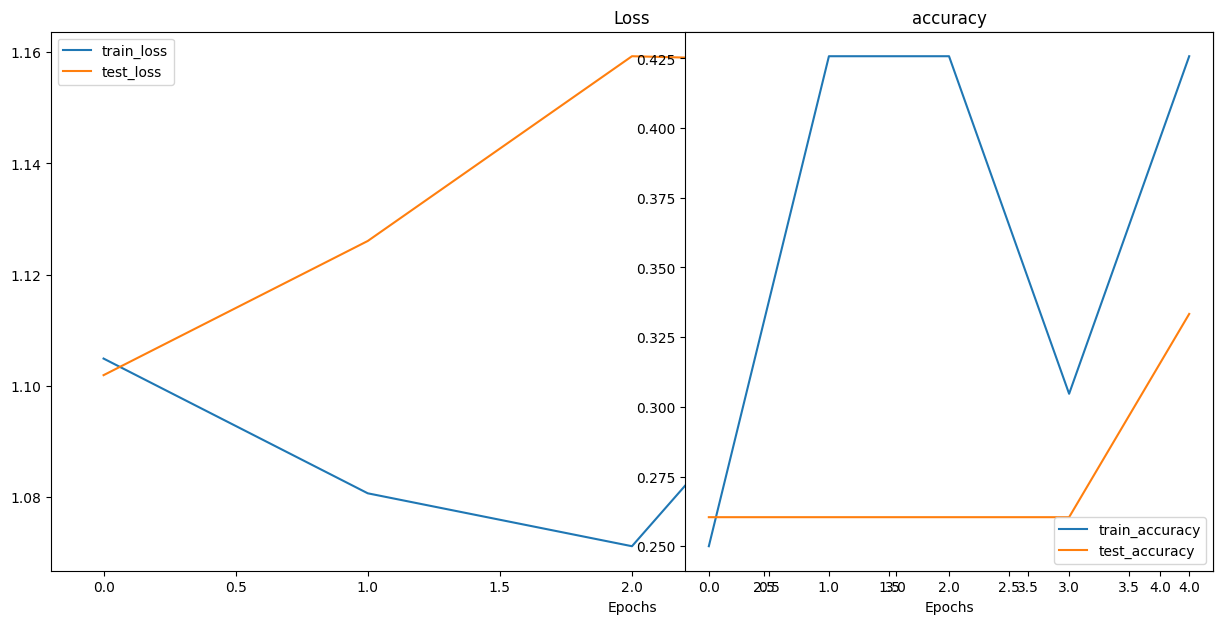

In [71]:
plot_loss_curves(model_1_results)

In [72]:
import pandas as pd
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.099003   0.304688   1.097916  0.260417
1    1.099547   0.304688   1.093886  0.301136
2    1.096258   0.425781   1.094230  0.531250
3    1.099559   0.281250   1.091738  0.541667
4    1.095383   0.414062   1.093165  0.572917

In [73]:
model_1_df

train_loss  train_acc  test_loss  test_acc
0    1.104914   0.250000   1.101928  0.260417
1    1.080687   0.425781   1.126056  0.260417
2    1.071172   0.425781   1.159275  0.260417
3    1.125308   0.304688   1.158067  0.260417
4    1.086534   0.425781   1.155441  0.333333

#WE can see that data augmentation is not the best way to make the model better

In [74]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:

    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")

Lets try to run the random pizza dad image in our model

The image should be of tensor form,shape 64x64x3,on the right device

#torchvision.io.read_image(str(custom_image_path)) reads the image file and converts it into a PyTorch tensor.

In [75]:
import torchvision

custom_image_uint8=torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

(-0.5, 3023.5, 4031.5, -0.5)

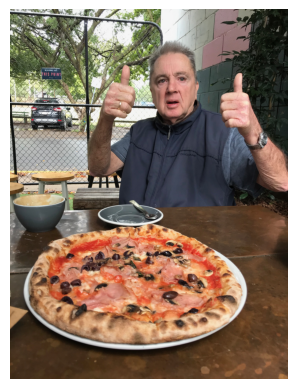

In [76]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis(False)

In [77]:
#Make prediction with our model
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [78]:
custom_image=torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [79]:
#Make prediction with our model
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

torch.Size([10, 2014, 1510])
torch.Size([10, 1005, 753])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

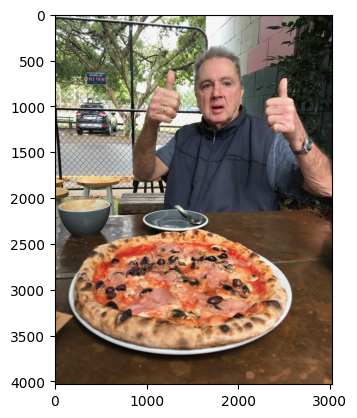

In [80]:
plt.imshow(custom_image.permute(1,2,0))

In [81]:
#Create transform pipeline to resize image ad this image is too big...u can see in the error

from torchvision import transforms
custom_image_transform=transforms.Compose([
    transforms.Resize(size=(64,64))
])
custom_image_transformed=custom_image_transform(custom_image)

print(f"Original shape:{custom_image.shape}")
print(f"Transformed shape:{custom_image_transformed.shape}")

Original shape:torch.Size([3, 4032, 3024])
Transformed shape:torch.Size([3, 64, 64])


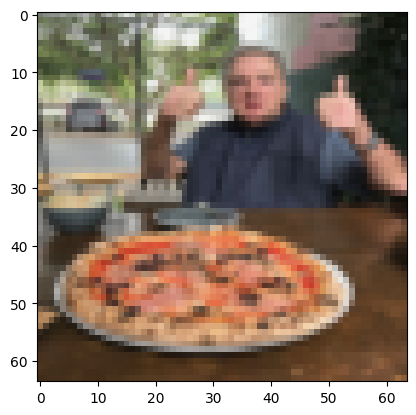

In [82]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [83]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred=model_1(custom_image_transformed)

torch.Size([10, 30, 30])
torch.Size([10, 13, 13])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [84]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred=model_1(custom_image_transformed.to(device))

torch.Size([10, 30, 30])
torch.Size([10, 13, 13])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [85]:
custom_image_transformed.shape,custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [86]:
#This should work because we added a batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred=model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


tensor([[ 0.0781,  0.0379, -0.2067]])

In [87]:
class_names

['pizza', 'steak', 'sushi']

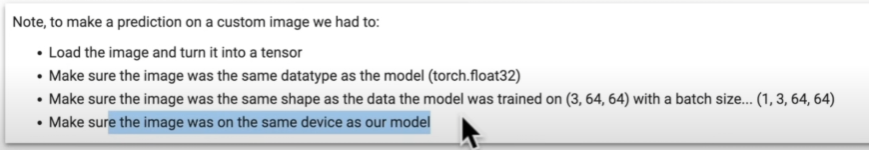

In [88]:
custom_image_pred_probs=torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.3686, 0.3541, 0.2773]])

In [89]:
custom_image_pred_labels=torch.argmax(custom_image_pred_probs,dim=1)
custom_image_pred_labels

tensor([0])

In [90]:
class_names[custom_image_pred_labels]

'pizza'

#Putting custom image prediction together:building a function

In [92]:
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str]=None,
                        transform=None,
                        device=device):
  target_image=torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image=target_image/255.

  #tranform if necessary
  if transform:
    target_image=transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    #add an extra dimension to the image(this is the batch dimension, eg our model will predict)
    target_image=target_image.unsqueeze(dim=0)

    #Make a prediction on the image with an extra dimension
    target_image_pred=model(target_image.to(device))

    #convert logits->prediction prob
    target_image_pred_probs=torch.softmax(target_image_pred,dim=1)

    #convert prediction prob->labels
    target_image_pred_labels=torch.argmax(target_image_pred_probs,dim=1)

    #plot the image alongside the prediction and prediction prob
    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
      title=f"Pred:{class_names[target_image_pred_labels.cpu()]} | Prob:{target_image_pred_probs.max().cpu():.3f}"
    else:
      title=f"Pred:{target_image_pred_labels} | Prob:{target_image_pred_probs.max().cpu():.3f}"

    plt.title(title)
    plt.axis(False)


torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


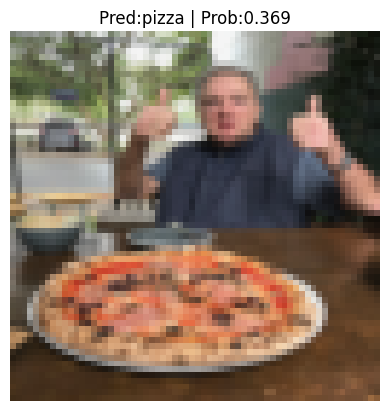

In [94]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)